In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import copy

In [2]:
original_img = cv2.imread("/usercode/images/electronics/BBB.jpg")
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))

error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


In [3]:
# In a previous exercise, we found the fiducials
fiducial_centers = [(240, 587), (867, 154), (115, 93)]
annotated_img = copy.deepcopy(original_img)
# Draw a circle around the fiducials
for fiducial_center in fiducial_centers:
    cv2.circle(annotated_img, fiducial_center, 35, (255, 0, 0), thickness=4)
plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))

error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'circle'
> Overload resolution failed:
>  - img is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'img'


In [4]:
# Identify the North-West fiducial
import sys
def north_west(points_list):
    north_west_point = None
    smallest_x_plus_y = sys.maxsize
    for p in points_list:
        x_plus_y = p[0] + p[1]
        if x_plus_y < smallest_x_plus_y:
            smallest_x_plus_y = x_plus_y
            north_west_point = p
    return north_west_point

north_west_fiducial = north_west(fiducial_centers)
print(f"north_west_fiducial = {north_west_fiducial}")

north_west_fiducial = (115, 93)


In [6]:
# The white rectangle containg the connections to inspect is 13.8 millimeters to the right of the North-West fiducial
# The white rectangle is 60.0 x 5.2 mm
resolution_in_millimeters_per_pixel = 0.093
distance_from_north_west_fiducial_in_mm = 13.8
rectangle_width_in_mm = 60.0
rectangle_height_in_mm = 5.2

# Translate the dimensions in millimeters to pixels
distance_from_north_west_fiducial_in_pixels = round(distance_from_north_west_fiducial_in_mm / resolution_in_millimeters_per_pixel)
rectangle_width_in_pixels = round(rectangle_width_in_mm / resolution_in_millimeters_per_pixel)
rectangle_height_in_pixels = round(rectangle_height_in_mm / resolution_in_millimeters_per_pixel)

In [7]:
# Validate visually the approximate rectangle location
approximate_location_img = copy.deepcopy(original_img)
approximate_rect = (north_west_fiducial[0] + distance_from_north_west_fiducial_in_pixels,
                   north_west_fiducial[1] - rectangle_height_in_pixels//2,
                   rectangle_width_in_pixels, rectangle_height_in_pixels)
cv2.rectangle(approximate_location_img, approximate_rect, (0, 255, 0), thickness=3)
plt.imshow(cv2.cvtColor(approximate_location_img, cv2.COLOR_BGR2RGB))

error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - rectangle() missing required argument 'color' (pos 4)
>  - rectangle() missing required argument 'color' (pos 4)
>  - img is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'img'


In [8]:
# Create a mask of the inspection area approximate location
inspection_area_mask = np.zeros((original_img.shape[: -1]), dtype=np.uint8)
cv2.rectangle(inspection_area_mask, approximate_rect, 255, thickness=-1)
# Dilate the mask to take into account the fact that it is only approximately known
dilation_kernel = np.ones((45, 45), dtype=np.uint8)
inspection_area_mask = cv2.dilate(inspection_area_mask, dilation_kernel)
plt.imshow(inspection_area_mask)

AttributeError: 'str' object has no attribute 'shape'

In [9]:
# Validate visually that the white rectangle is completely included in the mask
masked_img = np.minimum(original_img, cv2.cvtColor(inspection_area_mask, cv2.COLOR_GRAY2BGR))
plt.imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB))

NameError: name 'inspection_area_mask' is not defined

In [10]:
# Find the channel with the best contrast
blue_img, green_img, red_img = cv2.split(original_img)
# We'll use the green channel
plt.imshow(green_img)

error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'split'
> Overload resolution failed:
>  - m is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'm'


TypeError: Image data of dtype object cannot be converted to float

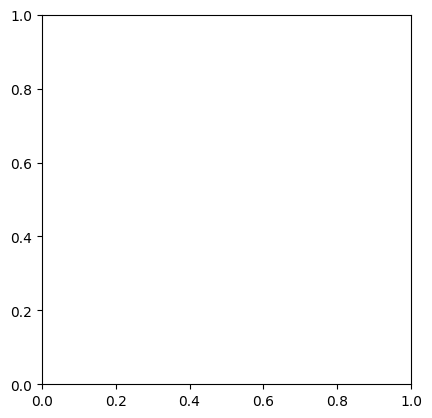

In [12]:
# >>> Compute the Sobel y edge detection: dx=0, dy=1
sobel_y_img = None
plt.imshow(sobel_y_img)

TypeError: Image data of dtype object cannot be converted to float

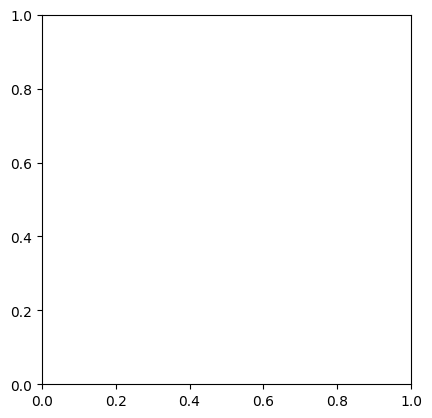

In [13]:
# >>> Threshold sobel_y_img with a threshold of 300
retval, thresholded_sobel_y_img = None, None
plt.imshow(thresholded_sobel_y_img)

TypeError: Image data of dtype object cannot be converted to float

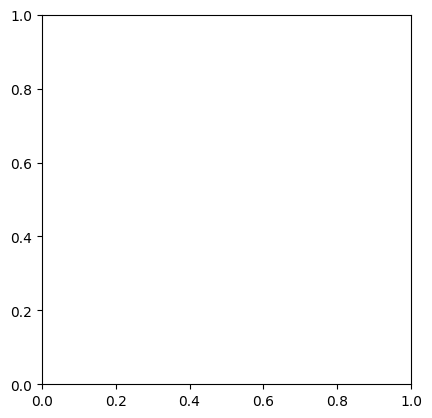

In [14]:
# >>> Mask thresholded_sobel_y_img such that it is zero everywhere the mask is inactive
thresholded_sobel_y_img = None
plt.imshow(thresholded_sobel_y_img)

TypeError: Image data of dtype object cannot be converted to float

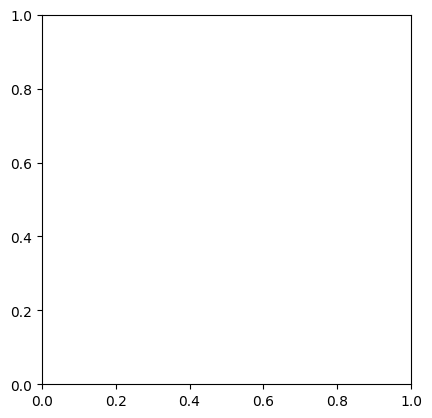

In [15]:
# >>> Apply thinning to thresholded_sobel_y_img
thresholded_sobel_y_img = None
plt.imshow(thresholded_sobel_y_img)

In [16]:
# Hough line detection
rho_resolution = 1.0
theta_resolution = 0.01
hough_threshold = 300
# >>> Detect the Hough lines in thresholded_sobel_y_img
horizontal_lines = None
print(f"horizontal_lines = {horizontal_lines}")

horizontal_lines = None


TypeError: Image data of dtype object cannot be converted to float

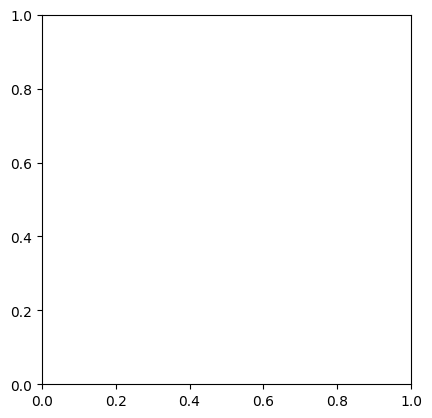

In [17]:
# >>> Compute the Sobel x edge detection: dx=1, dy=0
sobel_x_img = None
plt.imshow(sobel_x_img)

TypeError: Image data of dtype object cannot be converted to float

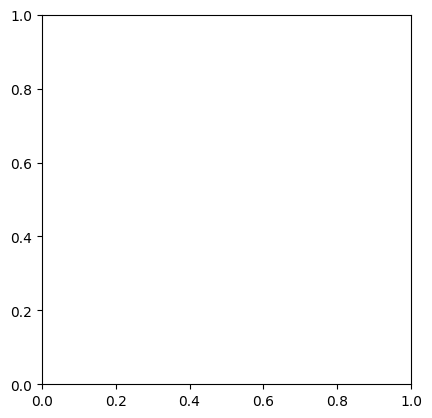

In [18]:
# >>> Threshold sobel_x_img with a threshold of 300
retval, thresholded_sobel_x_img = None, None
plt.imshow(thresholded_sobel_x_img)

TypeError: Image data of dtype object cannot be converted to float

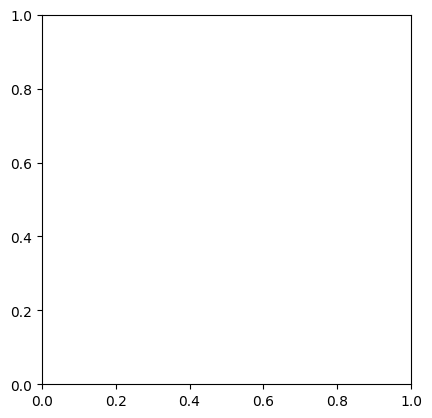

In [19]:
# >>> Mask thresholded_sobel_x_img such that it is zero everywhere the mask is inactive
thresholded_sobel_x_img = None
plt.imshow(thresholded_sobel_x_img)

TypeError: Image data of dtype object cannot be converted to float

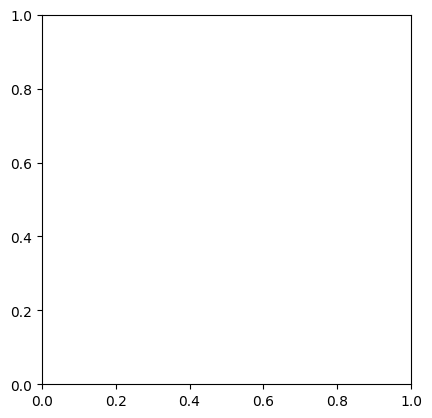

In [20]:
# >>> Apply thinning to thresholded_sobel_x_img
thresholded_sobel_x_img = None
plt.imshow(thresholded_sobel_x_img)

In [21]:
# Hough line detection
rho_resolution = 1.0
theta_resolution = 0.01
hough_threshold = 45
# >>> Detect the Hough lines in thresholded_sobel_x_img
vertical_lines = None
print(f"vertical_lines = {vertical_lines}")

vertical_lines = None


In [22]:
# Drawing utility
import math
def DrawLine(image, rho_theta, color):
    rho = rho_theta[0]
    theta = rho_theta[1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = round(x0 - 1000 * b)
    y1 = round(y0 + 1000 * a)
    x2 = round(x0 + 1000 * b)
    y2 = round(y0 - 1000 * a)
    cv2.line(image, (x1, y1), (x2, y2), color=color, thickness=1)

In [23]:
# Draw the two strongest horizontal and vertical lines
annotated_lines_img = copy.deepcopy(original_img)
DrawLine(annotated_lines_img, horizontal_lines[0][0], (255, 0, 0))
DrawLine(annotated_lines_img, horizontal_lines[1][0], (0, 255, 0))
DrawLine(annotated_lines_img, vertical_lines[0][0], (0, 0, 255))
DrawLine(annotated_lines_img, vertical_lines[1][0], (0, 255, 255))
plt.imshow(cv2.cvtColor(annotated_lines_img, cv2.COLOR_BGR2RGB))

TypeError: 'NoneType' object is not subscriptable